In [2]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
pd.set_option('display.max_rows', None)  # To display all rows 
pd.set_option('display.max_columns', None)  # To display all columns

In [4]:
# Paths to datasets
train_dir = './Training_Set/Training'
val_dir = './Evaluation_Set/Validation'
test_dir = './Test_Set/Test'

train_labels_path = './Training_Set/RFMiD_Training_Labels.csv'
val_labels_path = './Evaluation_Set/RFMiD_Validation_Labels.csv'
test_labels_path = './Test_Set/RFMiD_Testing_Labels.csv'

In [5]:
# Load labels
train_labels = pd.read_csv(train_labels_path)
val_labels = pd.read_csv(val_labels_path)
test_labels = pd.read_csv(test_labels_path)

In [6]:
# Print dataset shapes
print("Train labels shape:", train_labels.shape)
print("Validation labels shape:", val_labels.shape)
print("Test labels shape:", test_labels.shape)

Train labels shape: (1920, 47)
Validation labels shape: (640, 47)
Test labels shape: (640, 47)


In [8]:
# Data Preprocessing
def load_images_and_labels(image_dir, labels_df):
    images = []
    labels = []
    for index, row in labels_df.iterrows():
        img_path = os.path.join(image_dir, f"{row['ID']}.png")
        if os.path.exists(img_path):
            img = cv2.imread(img_path)  # Load the image in BGR format
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = cv2.resize(img, (224, 224))  # Resize images to 224x224
            images.append(img)
            labels.append(row['Disease_Risk'])
    return np.array(images), np.array(labels)

# Load images and labels
X_train, y_train = load_images_and_labels(train_dir, train_labels)
X_val, y_val = load_images_and_labels(val_dir, val_labels)
X_test, y_test = load_images_and_labels(test_dir, test_labels)


In [10]:
# Normalize the images
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [12]:
# Image Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [13]:
# Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\MONSTER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=40
)

c:\Users\MONSTER\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
60/60 ━━━━━━━━━━━━━━━━━━━━ 56s 898ms/step - accuracy: 0.7997 - loss: 0.5259 - val_accuracy: 0.7906 - val_loss: 0.5494
Epoch 2/40
60/60 ━━━━━━━━━━━━━━━━━━━━ 52s 864ms/step - accuracy: 0.7858 - loss: 0.4998 - val_accuracy: 0.7906 - val_loss: 0.5105
Epoch 3/40
60/60 ━━━━━━━━━━━━━━━━━━━━ 50s 837ms/step - accuracy: 0.7988 - loss: 0.4703 - val_accuracy: 0.7906 - val_loss: 0.4644
Epoch 4/40
60/60 ━━━━━━━━━━━━━━━━━━━━ 52s 859ms/step - accuracy: 0.7927 - loss: 0.4485 - val_accuracy: 0.7906 - val_loss: 0.4464
Epoch 5/40
60/60 ━━━━━━━━━━━━━━━━━━━━ 51s 850ms/step - accuracy: 0.7875 - loss: 0.4674 - val_accuracy: 0.7906 - val_loss: 0.4733
Epoch 6/40
60/60 ━━━━━━━━━━━━━━━━━━━━ 52s 862ms/step - accuracy: 0.7834 - loss: 0.4516 - val_accuracy: 0.7906 - val_loss: 0.4351
Epoch 7/40
60/60 ━━━━━━━━━━━━━━━━━━━━ 54s 903ms/step - accuracy: 0.7831 - loss: 0.4540 - val_accuracy: 0.7906 - val_loss: 0.4336
Epoch 8/40
60/60 ━━━━━━━━━━━━━━━━━━━━ 52s 861ms/step - accuracy: 0.7814 - loss: 0.4581 - val_accu

In [15]:
# Model Evaluation
y_pred = (model.predict(X_test) > 0.2).astype("int32")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 239ms/step
Accuracy: 0.8109375
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.10      0.19       134
           1       0.81      1.00      0.89       506

    accuracy                           0.81       640
   macro avg       0.87      0.55      0.54       640
weighted avg       0.83      0.81      0.75       640



In [16]:
# Plot training history
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1, 21)), y=history.history['accuracy'], mode='lines', name='Train Accuracy'))
fig.add_trace(go.Scatter(x=list(range(1, 21)), y=history.history['val_accuracy'], mode='lines', name='Validation Accuracy'))
fig.update_layout(title='Model Accuracy', xaxis_title='Epoch', yaxis_title='Accuracy')
fig.show()

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1, 21)), y=history.history['loss'], mode='lines', name='Train Loss'))
fig.add_trace(go.Scatter(x=list(range(1, 21)), y=history.history['val_loss'], mode='lines', name='Validation Loss'))
fig.update_layout(title='Model Loss', xaxis_title='Epoch', yaxis_title='Loss')
fig.show()

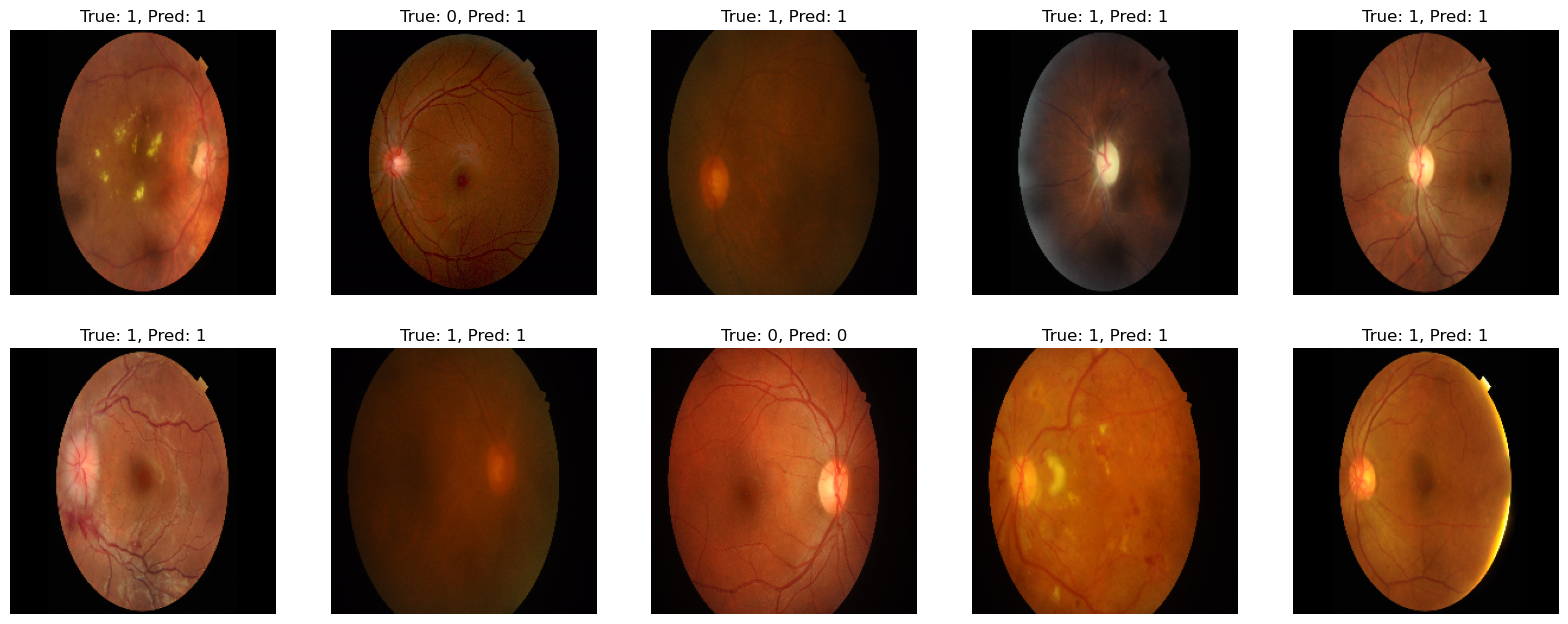

In [45]:
# Display random samples with actual and predicted labels
def display_random_samples(images, true_labels, pred_labels, sample_count=10):
    # Şekilleri kontrol et
    pred_labels = pred_labels.reshape(-1, 1) if len(pred_labels.shape) == 1 else pred_labels
    sample_count = min(sample_count, len(images))  # Maksimum görüntü sayısını aşma
    
    random_indices = np.random.choice(len(images), size=sample_count, replace=False)  # Rastgele indeks seç
    plt.figure(figsize=(20, 20))
    for i, idx in enumerate(random_indices):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[idx])
        plt.title(f"True: {true_labels[idx]}, Pred: {pred_labels[idx][0]}")
        plt.axis('off')
    plt.show()

display_random_samples(X_test, y_test, y_pred, sample_count=10)

